# Hosplitality Industry Exploratory Data Analysis

#### Importing libraries and data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('sunshine_hotels_data.csv')

#### checking head of data using df.head() function

In [3]:
df.head()

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year
0,South Star Comfort Inn,Bengaluru,Business,2,3,1,4000,Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022
1,Kalyan Essentials,Chennai,Business,1,3,1,3500,Travel Management Company,Cognizant,Sales Portfolio 1,January,2020
2,Grand Hotel Bengaluru,Bengaluru,Business,4,3,1,4500,Travel Management Company,Flipkart Internet Pvt Ltd,Sales Portfolio 1,January,2019
3,Grand Hotel Bengaluru,Bengaluru,Business,4,3,1,7000,Travel Management Company,Marlabs Innovations Private Limited,Sales Portfolio 1,January,2019
4,Westside Comfort Hotel,Ghaziabad,Business,2,1,1,7500,Travel Management Company,Mindlance /ML OUTSOURCING SERVICES PVT LTD,Sales Portfolio 1,October,2018


#### checking shape of the data 

In [4]:
df.shape

(39861, 12)

we get to know that there are 39861 rows and 12 columns in the data 

### columns

In [5]:
df.columns

Index(['hotel_name', 'city', 'hotel_type', 'hotel_category', 'zone',
       'room_nights', 'room_revenue', 'business_source', 'account_name',
       'sales_portfolio', 'month', 'year'],
      dtype='object')

#### checking missing/null values 

In [6]:
df.isnull().sum()

hotel_name         0
city               0
hotel_type         0
hotel_category     0
zone               0
room_nights        0
room_revenue       0
business_source    0
account_name       0
sales_portfolio    0
month              0
year               0
dtype: int64

we found that no null values present in our data

### Dealing with duplicate records

In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df.shape

(28581, 12)

so we get to know that there were 11280 duplicate records in our data,we need to drop it because it may cause error for analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28581 entries, 0 to 39860
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hotel_name       28581 non-null  object
 1   city             28581 non-null  object
 2   hotel_type       28581 non-null  object
 3   hotel_category   28581 non-null  int64 
 4   zone             28581 non-null  int64 
 5   room_nights      28581 non-null  int64 
 6   room_revenue     28581 non-null  object
 7   business_source  28581 non-null  object
 8   account_name     28581 non-null  object
 9   sales_portfolio  28581 non-null  object
 10  month            28581 non-null  object
 11  year             28581 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.8+ MB


we can see which column has which dtype, 8 columns are categorical and 4 columns are numericals but some of them are categorical but they are encoded so data types has changed. 'room_revenue' columns should be numeric so we will change it 

### Feature Engineering

In [10]:
df['room_revenue'] = df ['room_revenue'].replace ( [' -   '],0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28581 entries, 0 to 39860
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hotel_name       28581 non-null  object
 1   city             28581 non-null  object
 2   hotel_type       28581 non-null  object
 3   hotel_category   28581 non-null  int64 
 4   zone             28581 non-null  int64 
 5   room_nights      28581 non-null  int64 
 6   room_revenue     28581 non-null  object
 7   business_source  28581 non-null  object
 8   account_name     28581 non-null  object
 9   sales_portfolio  28581 non-null  object
 10  month            28581 non-null  object
 11  year             28581 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.8+ MB


In [12]:
df['room_revenue'] = df ['room_revenue'].astype('int64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28581 entries, 0 to 39860
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   hotel_name       28581 non-null  object
 1   city             28581 non-null  object
 2   hotel_type       28581 non-null  object
 3   hotel_category   28581 non-null  int64 
 4   zone             28581 non-null  int64 
 5   room_nights      28581 non-null  int64 
 6   room_revenue     28581 non-null  int64 
 7   business_source  28581 non-null  object
 8   account_name     28581 non-null  object
 9   sales_portfolio  28581 non-null  object
 10  month            28581 non-null  object
 11  year             28581 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 2.8+ MB


In [14]:
df.head(2)

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year
0,South Star Comfort Inn,Bengaluru,Business,2,3,1,4000,Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022
1,Kalyan Essentials,Chennai,Business,1,3,1,3500,Travel Management Company,Cognizant,Sales Portfolio 1,January,2020


#### Creating new columns RevPD and RPD

In [15]:
df['RevPD']=df['room_revenue']/365

In [16]:
df['RPD']=df['room_nights']/365

In [17]:
df.head(2)

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year,RevPD,RPD
0,South Star Comfort Inn,Bengaluru,Business,2,3,1,4000,Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022,10.958904,0.00274
1,Kalyan Essentials,Chennai,Business,1,3,1,3500,Travel Management Company,Cognizant,Sales Portfolio 1,January,2020,9.589041,0.00274


### Overview of Data 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28581 entries, 0 to 39860
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hotel_name       28581 non-null  object 
 1   city             28581 non-null  object 
 2   hotel_type       28581 non-null  object 
 3   hotel_category   28581 non-null  int64  
 4   zone             28581 non-null  int64  
 5   room_nights      28581 non-null  int64  
 6   room_revenue     28581 non-null  int64  
 7   business_source  28581 non-null  object 
 8   account_name     28581 non-null  object 
 9   sales_portfolio  28581 non-null  object 
 10  month            28581 non-null  object 
 11  year             28581 non-null  int64  
 12  RevPD            28581 non-null  float64
 13  RPD              28581 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 3.3+ MB


In [19]:
df.describe()

,hotel_category,zone,room_nights,room_revenue,year,RevPD,RPD
count,28581.000000,28581.000000,28581.000000,2.858100e+04,28581.000000,28581.000000,28581.000000
mean,2.151534,2.337812,6.309926,2.446495e+04,2019.673559,67.027265,0.017287
std,0.814982,1.107160,25.477929,9.699541e+04,1.480788,265.740859,0.069803
min,1.000000,1.000000,1.000000,0.000000e+00,2018.000000,0.000000,0.002740
25%,2.000000,1.000000,1.000000,4.500000e+03,2018.000000,12.328767,0.002740
50%,2.000000,3.000000,2.000000,8.500000e+03,2019.000000,23.287671,0.005479
75%,3.000000,3.000000,5.000000,1.800000e+04,2021.000000,49.315068,0.013699
max,4.000000,4.000000,961.000000,4.800000e+06,2022.000000,13150.684932,2.632877


df.describe() fucntion displays what is count, mean, std, min, 25%, 50%, 75% values and max values

## EDA

1.Univariate Analysis 

2.Bivariate Analysis 

3.Multivariate Analysis

In [20]:
df.head(2)

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year,RevPD,RPD
0,South Star Comfort Inn,Bengaluru,Business,2,3,1,4000,Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022,10.958904,0.00274
1,Kalyan Essentials,Chennai,Business,1,3,1,3500,Travel Management Company,Cognizant,Sales Portfolio 1,January,2020,9.589041,0.00274


In [21]:
df.hotel_name

0        South Star Comfort Inn
1             Kalyan Essentials
2        Grand Hotel Bengaluru 
3        Grand Hotel Bengaluru 
4        Westside Comfort Hotel
                  ...          
39856       Sander's Essentials
39857      The Southern Comfort
39858            Deccan Comfort
39859     Essentials Chandigarh
39860         Premium Hotel Goa
Name: hotel_name, Length: 28581, dtype: object

In [22]:
df.city

0         Bengaluru
1           Chennai
2         Bengaluru
3         Bengaluru
4         Ghaziabad
            ...    
39856     Hyderabad
39857         Kochi
39858     Bengaluru
39859    Chandigarh
39860           Goa
Name: city, Length: 28581, dtype: object

Hotels are based in this cities

In [23]:
df.hotel_type.value_counts()

Business    25316
Leisure      3265
Name: hotel_type, dtype: int64

we get to know that there are two types of hotels Business and Leisure and count of business hotels are more than leisure hotels

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

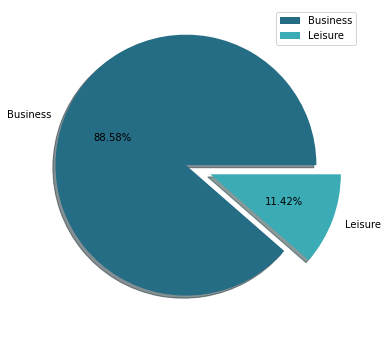

In [25]:
plt.figure(figsize= (15, 6))
data_pie  = [25316 , 3265]
labels = ["Business", "Leisure"]
explode = [0.1, 0.1]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

In [26]:
df.hotel_category.value_counts()

2    14330
3     6597
1     5858
4     1796
Name: hotel_category, dtype: int64

Economy= 1, Midscale= 2, Upscale= 3 and Upper Upscale= 4

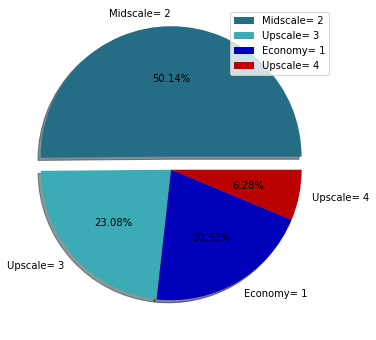

In [27]:
plt.figure(figsize= (15, 6))
data_pie  = [14330 , 6597, 5858, 1796]
labels = ["Midscale= 2", "Upscale= 3","Economy= 1", "Upscale= 4"]
explode = [0.1, 0,0, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6','#0000BB','#BB0000'])
plt.legend()
plt.show()

In [28]:
df.columns

Index(['hotel_name', 'city', 'hotel_type', 'hotel_category', 'zone',
       'room_nights', 'room_revenue', 'business_source', 'account_name',
       'sales_portfolio', 'month', 'year', 'RevPD', 'RPD'],
      dtype='object')

In [29]:
df.business_source.unique()

array(['Travel Management Company', 'Corporate', 'Travel Agent',
       ' Corporate ', ' Travel Agent ', ' Travel Management Company ',
       ' Social '], dtype=object)

In [30]:
f=(df.business_source==' Travel Management Company ')
df.loc[f,'business_source']='Travel Management Company'

In [31]:
f=(df.business_source==' Corporate ')
df.loc[f,'business_source']='Corporate'

In [32]:
f=(df.business_source==' Travel Agent ')
df.loc[f,'business_source']='Travel Agent'

In [33]:
f=(df.business_source==' Social ')
df.loc[f,'business_source']='Social'

In [34]:
df.business_source.unique()

array(['Travel Management Company', 'Corporate', 'Travel Agent', 'Social'],
      dtype=object)

In [35]:
df.business_source.value_counts()

Corporate                    14560
Travel Management Company    12401
Travel Agent                  1279
Social                         341
Name: business_source, dtype: int64

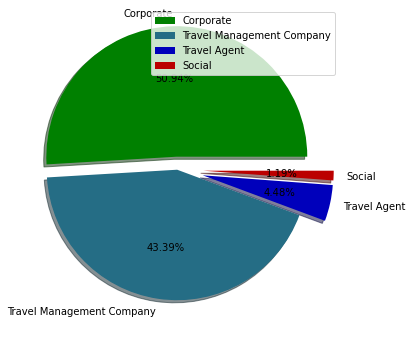

In [101]:
plt.figure(figsize= (15, 6))
data_pie  = [14560 , 12401, 1279, 341]
labels = ["Corporate", "Travel Management Company","Travel Agent", "Social"]
explode = [0.1,0,0.2, 0.2]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['green', '#256D85','#0000BB','#BB0000'])
plt.legend()
plt.show()

In [37]:
df.zone.value_counts()

3    13235
1    10740
4     3580
2     1026
Name: zone, dtype: int64

There are 4 zones and zones are encoded by numbers 1=north , 2=east, 3=south, 4=west

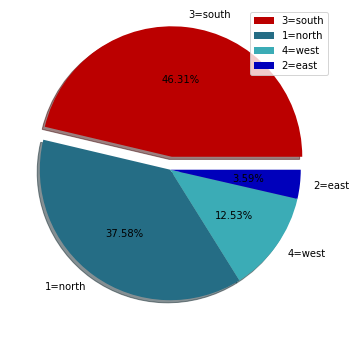

In [38]:
plt.figure(figsize= (15, 6))
data_pie  = [13235 , 10740, 3580, 1026]
labels = ["3=south", "1=north","4=west", "2=east"]
explode = [0.1, 0,0,0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#BB0000','#256D85', '#3BACB6','#0000BB'])
plt.legend()
plt.show()

In [39]:
df.room_nights

0          1
1          1
2          1
3          1
4          1
        ... 
39856      5
39857      5
39858    803
39859     23
39860    120
Name: room_nights, Length: 28581, dtype: int64

Text(0.5, 1.0, 'room_nights')

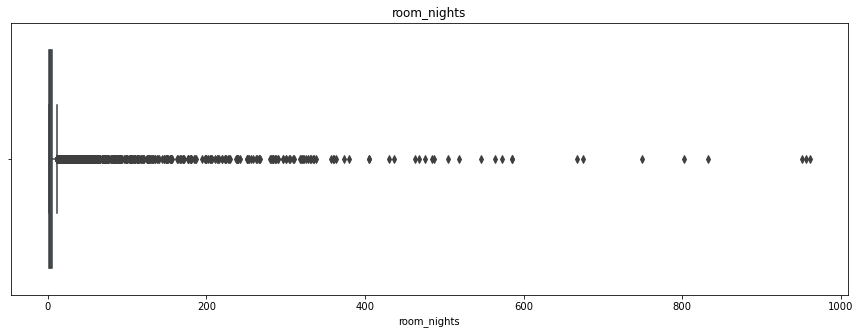

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.room_nights)
plt.title('room_nights')

room_nights is nothing but the number of room_nights sold (unit sold)

In [41]:
df.room_revenue

0           4000
1           3500
2           4500
3           7000
4           7500
          ...   
39856      12000
39857      13750
39858    3654453
39859    4185621
39860    4800000
Name: room_revenue, Length: 28581, dtype: int64

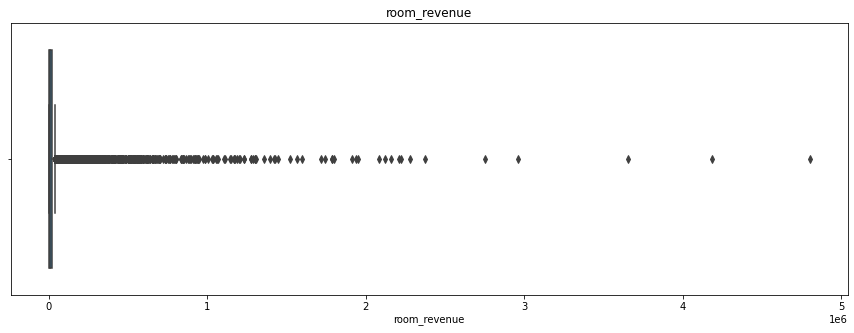

In [42]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.room_revenue)
plt.title('room_revenue')
plt.show()

In [43]:
portfolio=df.sales_portfolio.value_counts()
portfolio

Sales Portfolio 1      14324
Sales Portfolio 3       8881
Sales Portfolio 2       3906
Sales Portfolio 4        958
Support Portfolio 1      481
Support Portfolio 2       18
Support Portfolio 3       13
Name: sales_portfolio, dtype: int64

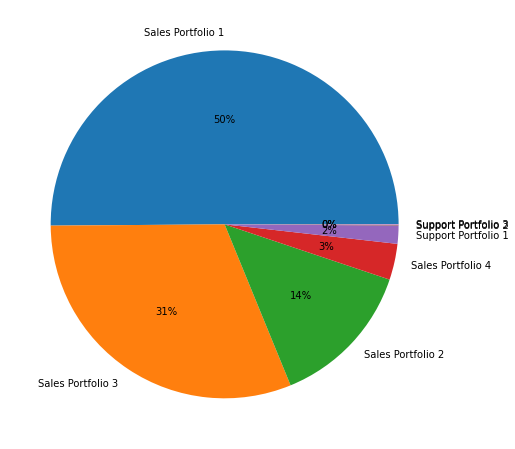

In [44]:
plt.figure(figsize=(8,8))
explode=[0,0,0,0,1,1,1]
plt.pie(portfolio.values, autopct='%.0f%%', labels=portfolio.index)
plt.show()

In [45]:
df.head(2)

,hotel_name,city,hotel_type,hotel_category,zone,room_nights,room_revenue,business_source,account_name,sales_portfolio,month,year,RevPD,RPD
0,South Star Comfort Inn,Bengaluru,Business,2,3,1,4000,Travel Management Company,Ather Energy pvt ltd,Sales Portfolio 2,March,2022,10.958904,0.00274
1,Kalyan Essentials,Chennai,Business,1,3,1,3500,Travel Management Company,Cognizant,Sales Portfolio 1,January,2020,9.589041,0.00274


In [46]:
df.RevPD

0           10.958904
1            9.589041
2           12.328767
3           19.178082
4           20.547945
             ...     
39856       32.876712
39857       37.671233
39858    10012.200000
39859    11467.454795
39860    13150.684932
Name: RevPD, Length: 28581, dtype: float64

Text(0.5, 1.0, 'RevPD')

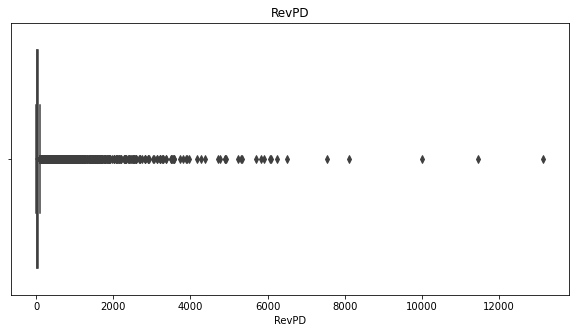

In [47]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.RevPD)
plt.title('RevPD')

In [48]:
df.RPD

0        0.002740
1        0.002740
2        0.002740
3        0.002740
4        0.002740
           ...   
39856    0.013699
39857    0.013699
39858    2.200000
39859    0.063014
39860    0.328767
Name: RPD, Length: 28581, dtype: float64

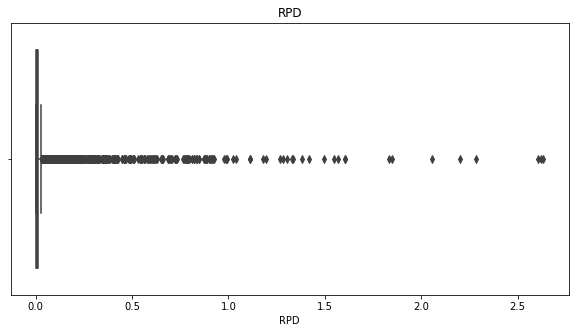

In [49]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.RPD)
plt.title('RPD')
plt.show()

In [50]:
df.columns

Index(['hotel_name', 'city', 'hotel_type', 'hotel_category', 'zone',
       'room_nights', 'room_revenue', 'business_source', 'account_name',
       'sales_portfolio', 'month', 'year', 'RevPD', 'RPD'],
      dtype='object')

Text(0.5, 1.0, 'hotel_name vs RevPD')

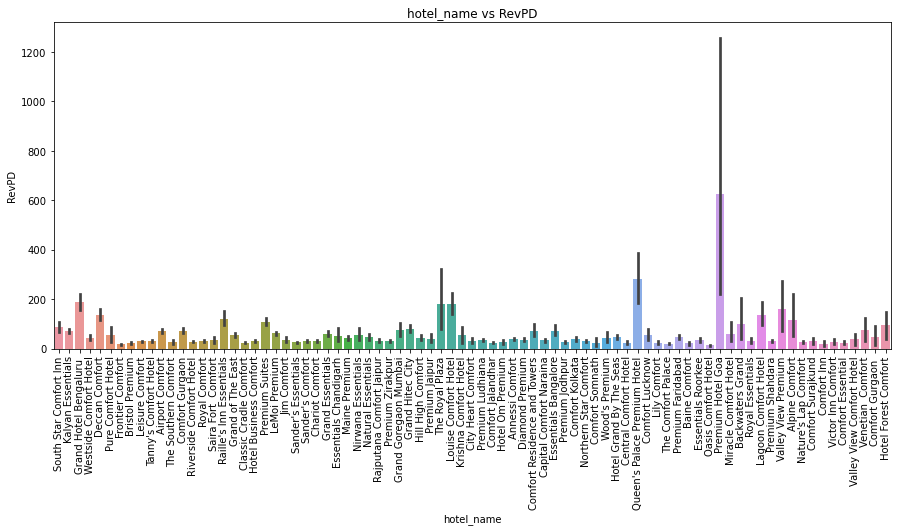

In [51]:
plt.figure(figsize=(15,6))
sns.barplot(x=df.hotel_name, y=df.RevPD, data=df)
plt.xticks(rotation=90)
plt.title('hotel_name vs RevPD')

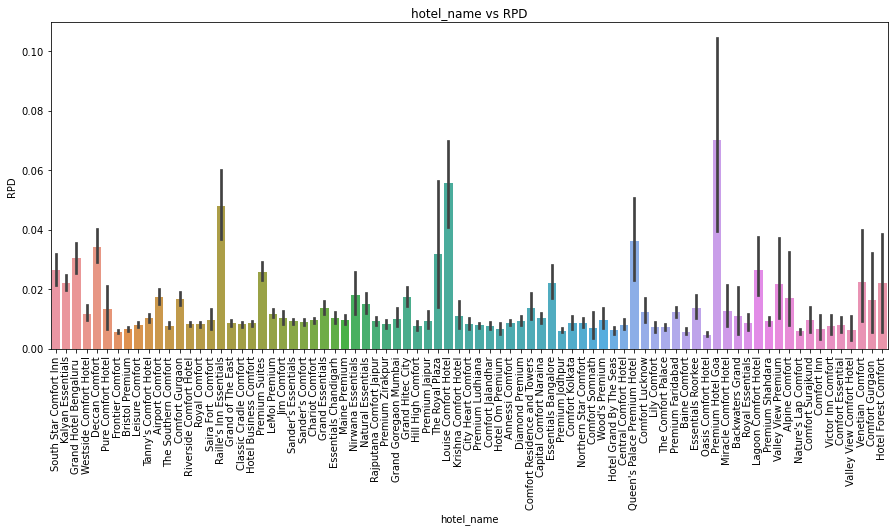

In [52]:
plt.figure(figsize=(15,6))
sns.barplot(x=df.hotel_name,y=df.RPD, data=df)
plt.xticks(rotation=90)
plt.title('hotel_name vs RPD')
plt.show()

Text(0.5, 1.0, 'city vs RevPD')

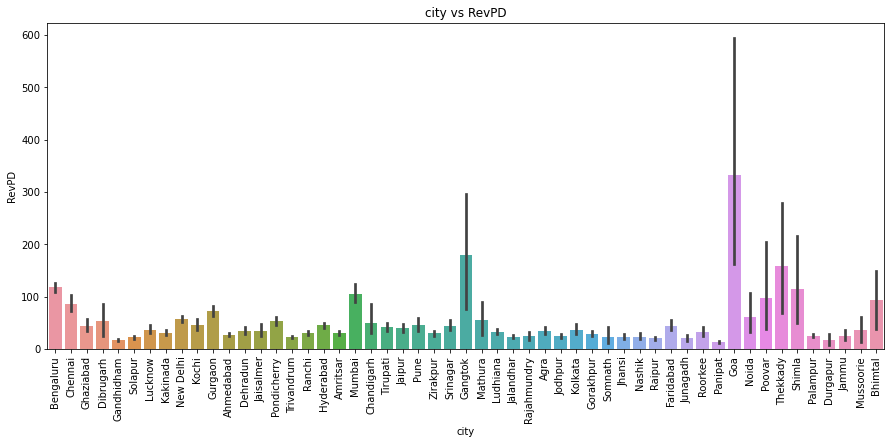

In [53]:
plt.figure(figsize=(15,6))
sns.barplot(x=df.city, y=df.RevPD, data=df)
plt.xticks(rotation=90)
plt.title('city vs RevPD')

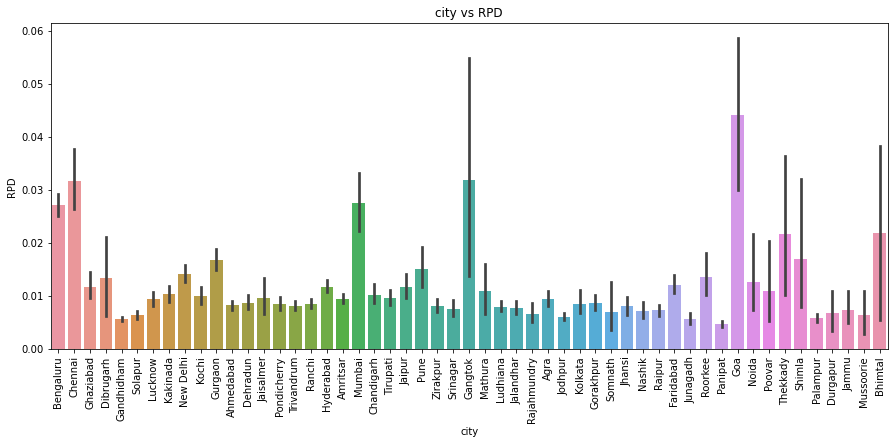

In [54]:
plt.figure(figsize=(15,6))
sns.barplot(x=df.city,y=df.RPD, data=df)
plt.xticks(rotation=90)
plt.title('city vs RPD')
plt.show()

In [55]:
df.columns

Index(['hotel_name', 'city', 'hotel_type', 'hotel_category', 'zone',
       'room_nights', 'room_revenue', 'business_source', 'account_name',
       'sales_portfolio', 'month', 'year', 'RevPD', 'RPD'],
      dtype='object')

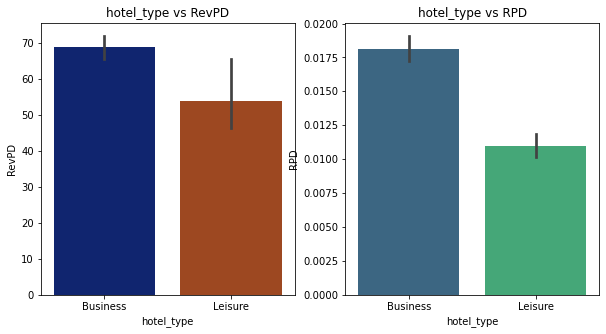

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.barplot(x=df.hotel_type, y=df.RevPD, data=df,palette='dark')
plt.title('hotel_type vs RevPD')

plt.subplot(122)
sns.barplot(x=df.hotel_type,y=df.RPD, data=df, palette='viridis')
plt.title('hotel_type vs RPD')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales_portfolio', ylabel='count'>

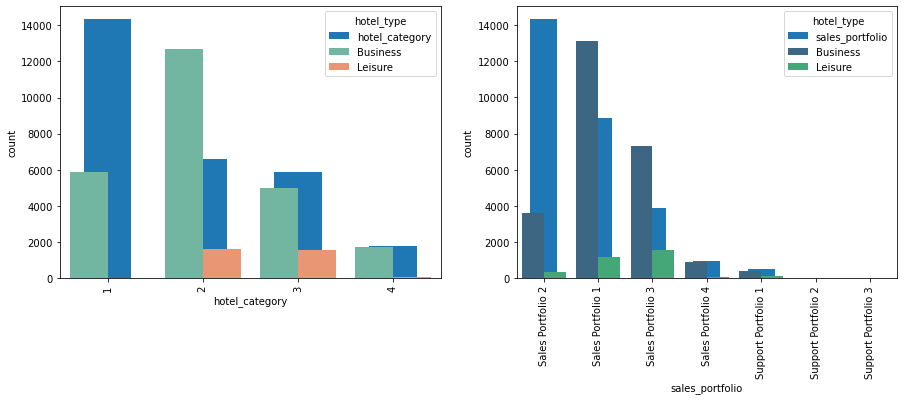

In [57]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
df['hotel_category'].value_counts().plot.bar()
sns.countplot('hotel_category',hue='hotel_type',data=df,palette='Set2')

plt.subplot(1,2,2)
df['sales_portfolio'].value_counts().plot.bar()
sns.countplot('sales_portfolio',hue='hotel_type',data=df,palette='viridis')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


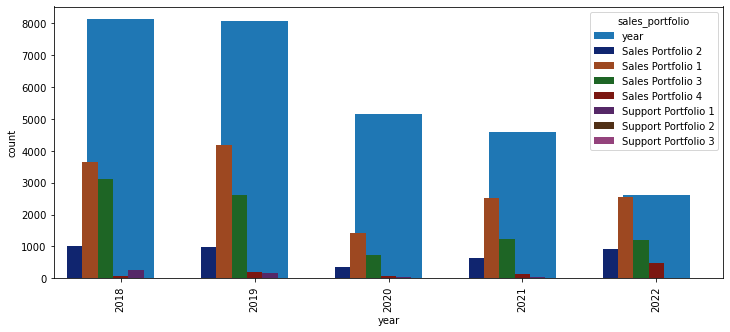

In [58]:
plt.figure(figsize=(12,5))
df['year'].value_counts().plot.bar()
sns.countplot('year',hue='sales_portfolio',data=df,palette='dark')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


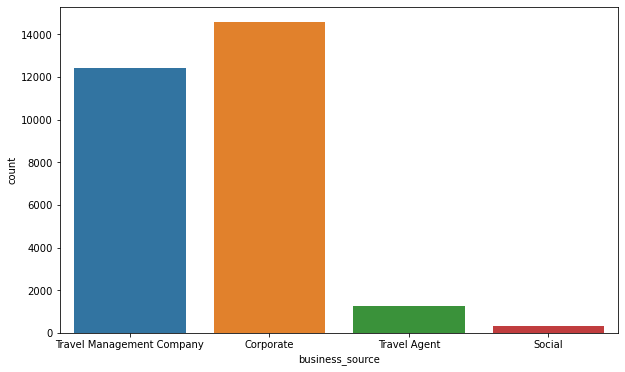

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(df.business_source,data=df)
plt.show()

In [60]:
df.columns

Index(['hotel_name', 'city', 'hotel_type', 'hotel_category', 'zone',
       'room_nights', 'room_revenue', 'business_source', 'account_name',
       'sales_portfolio', 'month', 'year', 'RevPD', 'RPD'],
      dtype='object')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

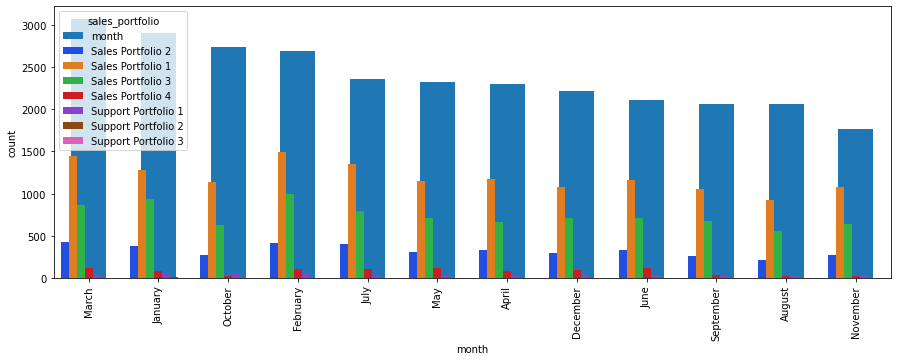

In [61]:
plt.figure(figsize=(15,5))
df['month'].value_counts().plot.bar()
sns.countplot('month',hue='sales_portfolio',data=df,palette='bright')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


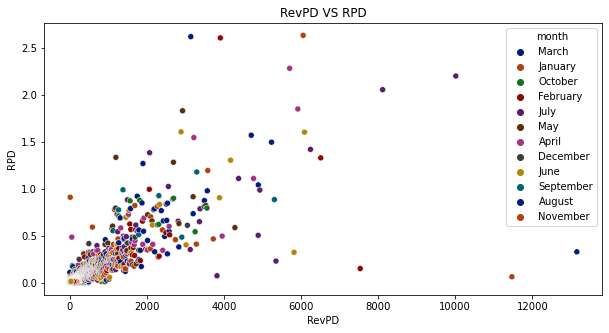

In [62]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['RevPD'],df['RPD'],hue=df.month,palette='dark')
plt.title('RevPD VS RPD')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


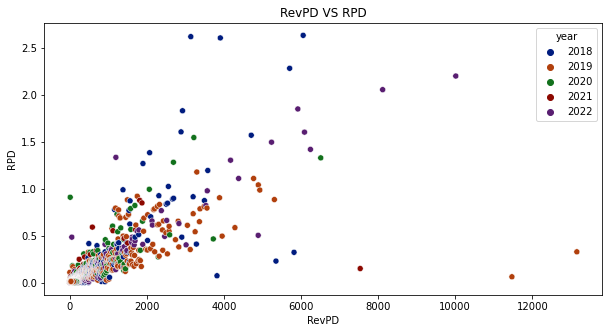

In [63]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['RevPD'],df['RPD'],hue=df.year,palette='dark')
plt.title('RevPD VS RPD')
plt.show()

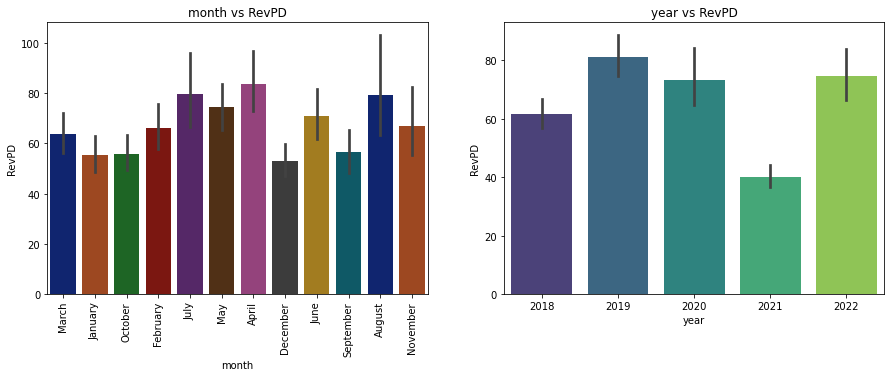

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=df.month, y=df.RevPD, data=df,palette='dark')
plt.xticks(rotation=90)
plt.title('month vs RevPD')

plt.subplot(122)
sns.barplot(x=df.year,y=df.RevPD, data=df, palette='viridis')
plt.title('year vs RevPD')
plt.show()

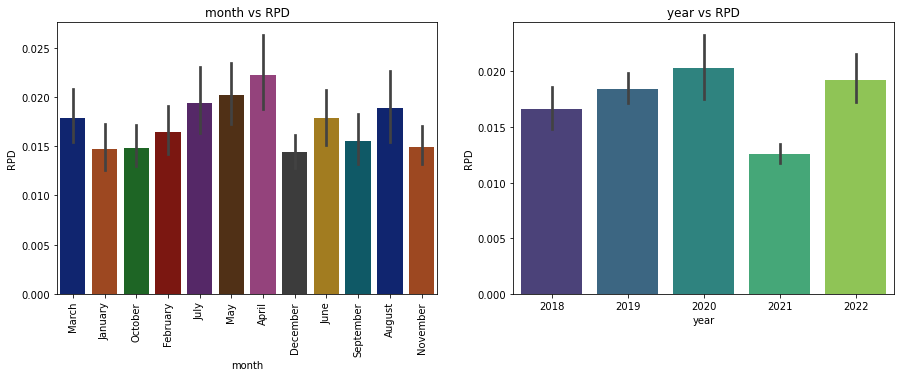

In [65]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(x=df.month, y=df.RPD, data=df,palette='dark')
plt.xticks(rotation=90)
plt.title('month vs RPD')

plt.subplot(122)
sns.barplot(x=df.year,y=df.RPD, data=df, palette='viridis')
plt.title('year vs RPD')
plt.show()

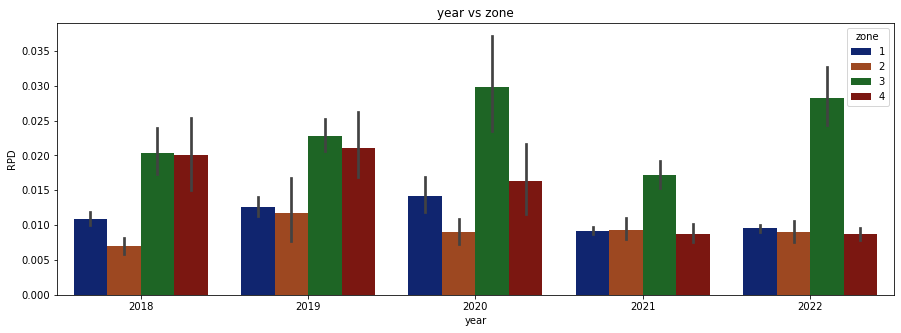

In [66]:
plt.figure(figsize=(15,5))
sns.barplot(x=df.year, y=df.RPD, hue=df.zone,data=df,palette='dark')
plt.title('year vs zone')
plt.show()

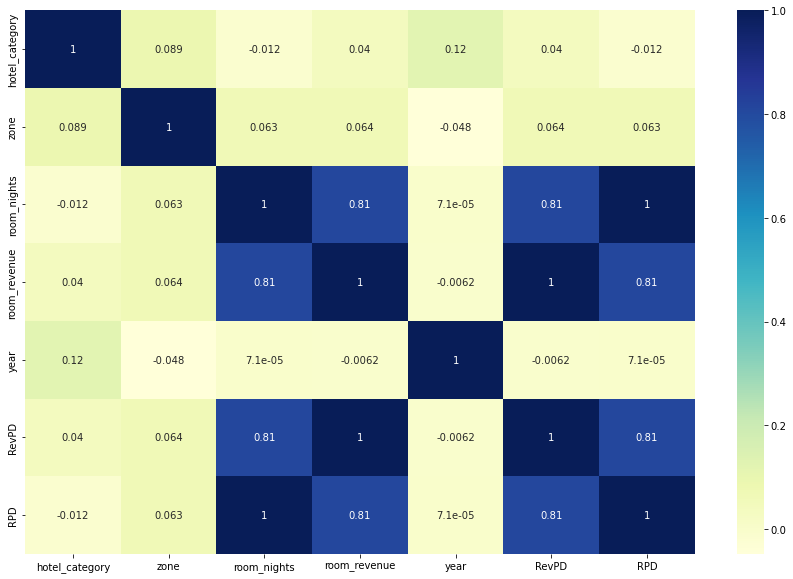

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [102]:
df.corr()

,hotel_category,zone,room_nights,room_revenue,year,RevPD,RPD
hotel_category,1.000000,0.088759,-0.011727,0.040200,0.121041,0.040200,-0.011727
zone,0.088759,1.000000,0.063126,0.064386,-0.048024,0.064386,0.063126
room_nights,-0.011727,0.063126,1.000000,0.808588,0.000071,0.808588,1.000000
room_revenue,0.040200,0.064386,0.808588,1.000000,-0.006196,1.000000,0.808588
year,0.121041,-0.048024,0.000071,-0.006196,1.000000,-0.006196,0.000071
RevPD,0.040200,0.064386,0.808588,1.000000,-0.006196,1.000000,0.808588
RPD,-0.011727,0.063126,1.000000,0.808588,0.000071,0.808588,1.000000
